# Epsilon Greedy

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

class EpsilonGreedy:
  def __init__(self, n_arms, epsilon):
    self.n_arms = n_arms
    self.epsilon = epsilon
    self.counts = np.zeros(n_arms)
    self.values = np.zeros(n_arms)

  def select_arm(self):
    if random.random() < self.epsilon:
      return random.randint(0, self.n_arms - 1)
    else:
      return np.argmax(self.values)

  def update(self, chosen_arm, reward):
    self.counts[chosen_arm] += 1
    n = self.counts[chosen_arm]
    value = self.values[chosen_arm]
    new_value = ((n - 1) / n) * value + (1 / n) * reward
    self.values[chosen_arm] = new_value

In [ ]:
def simulate_epsilon_greedy(n_arms, n_rounds, epsilon, true_probabilities):
  bandit = EpsilonGreedy(n_arms, epsilon)
  chosen_arms = []
  rewards = []

  for _ in range(n_rounds):
    chosen_arm = bandit.select_arm()
    chosen_arms.append(chosen_arm)
    reward = 1 if random.random() < true_probabilities[chosen_arm] else 0
    rewards.append(reward)
    bandit.update(chosen_arm, reward)
  return chosen_arms, rewards

In [ ]:
n_arms = 3
n_rounds = 1000
epsilon = 0.1
true_probabilities = [0.2, 0.5, 0.8]
chosen_arms_eg, rewards_eg = simulate_epsilon_greedy(n_arms, n_rounds, epsilon, true_probabilities)
cumulative_rewards_eg = np.cumsum(rewards_eg)
optimal_arm = np.argmax(true_probabilities)
optimal_choices_eg = [chosen_arm == optimal_arm for chosen_arm in chosen_arms_eg]
cumulative_optimal_choices_eg = np.cumsum(optimal_choices_eg)

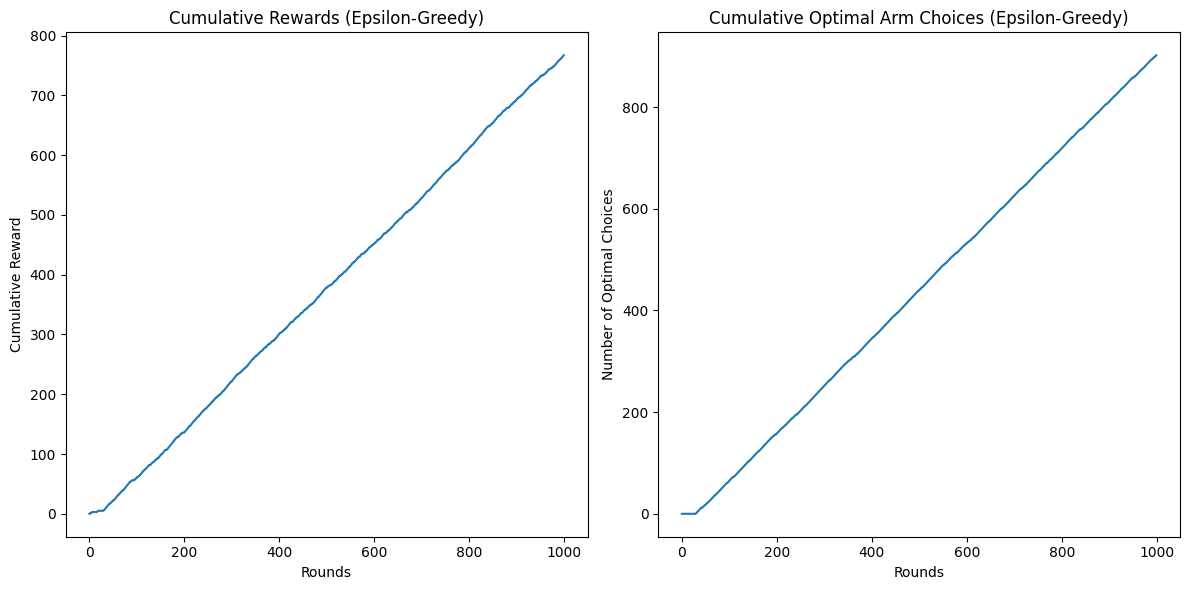

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cumulative_rewards_eg)
plt.title("Cumulative Rewards (Epsilon-Greedy)")
plt.xlabel("Rounds")
plt.ylabel("Cumulative Reward")
plt.subplot(1, 2, 2)
plt.plot(cumulative_optimal_choices_eg)
plt.title("Cumulative Optimal Arm Choices (Epsilon-Greedy)")
plt.xlabel("Rounds")
plt.ylabel("Number of Optimal Choices")
plt.tight_layout()
plt.show()

# Upper Confidence Bounds

In [ ]:
class UCB:
  def __init__(self, n_arms):
    self.n_arms = n_arms
    self.counts = np.zeros(n_arms)
    self.values = np.zeros(n_arms)

  def select_arm(self, round_number):
    if 0 in self.counts:
      return np.argmin(self.counts)

    ucb_values = np.zeros(self.n_arms)
    for i in range(self.n_arms):
      bonus = np.sqrt(2 * np.log(round_number + 1) / self.counts[i])
      ucb_values[i] = self.values[i] + bonus

    return np.argmax(ucb_values)

  def update(self, chosen_arm, reward):
    self.counts[chosen_arm] += 1
    n = self.counts[chosen_arm]
    value = self.values[chosen_arm]
    new_value = ((n - 1) / n) * value + (1 / n) * reward
    self.values[chosen_arm] = new_value

In [ ]:
def simulate_ucb(n_arms, n_rounds, true_probabilities):
  bandit = UCB(n_arms)
  chosen_arms = []
  rewards = []

  for round_number in range(n_rounds):
    chosen_arm = bandit.select_arm(round_number)
    chosen_arms.append(chosen_arm)
    reward = 1 if random.random() < true_probabilities[chosen_arm] else 0
    rewards.append(reward)
    bandit.update(chosen_arm, reward)
  return chosen_arms, rewards

In [ ]:
n_arms = 3
n_rounds = 1000
true_probabilities = [0.2, 0.5, 0.8]
chosen_arms_ucb, rewards_ucb = simulate_ucb(n_arms, n_rounds, true_probabilities)
cumulative_rewards_ucb = np.cumsum(rewards_ucb)
optimal_arm = np.argmax(true_probabilities)
optimal_choices_ucb = [chosen_arm == optimal_arm for chosen_arm in chosen_arms_ucb]
cumulative_optimal_choices_ucb = np.cumsum(optimal_choices_ucb)

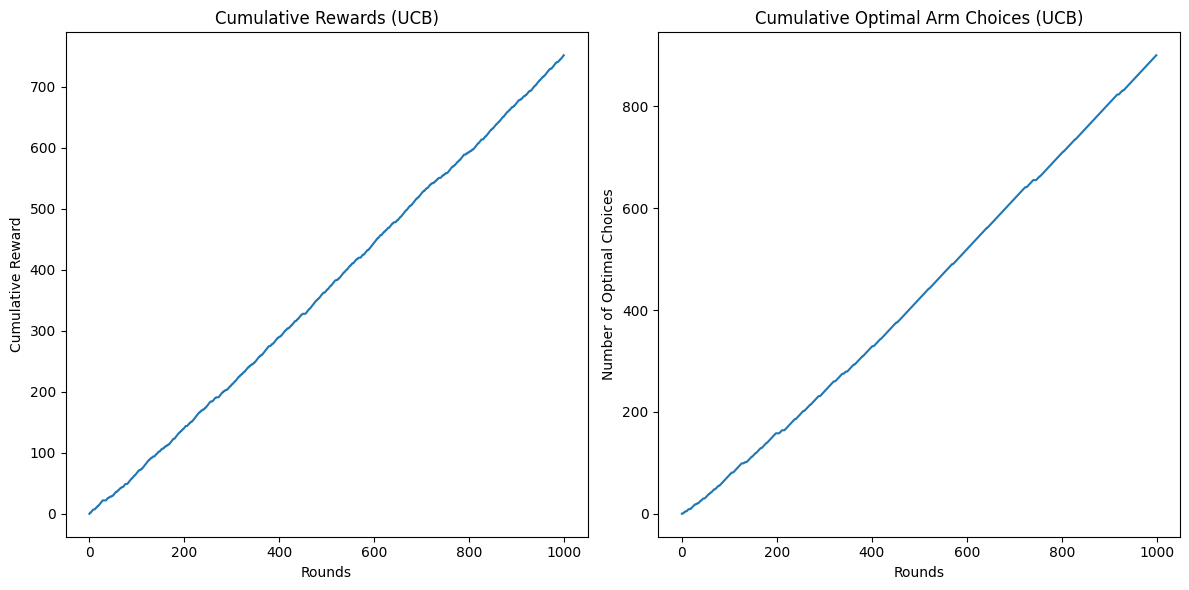

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cumulative_rewards_ucb)
plt.title("Cumulative Rewards (UCB)")
plt.xlabel("Rounds")
plt.ylabel("Cumulative Reward")
plt.subplot(1, 2, 2)
plt.plot(cumulative_optimal_choices_ucb)
plt.title("Cumulative Optimal Arm Choices (UCB)")
plt.xlabel("Rounds")
plt.ylabel("Number of Optimal Choices")
plt.tight_layout()
plt.show()

# Thompson Sampling

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math
import time

class ThompsonSampling:
  def __init__(self, n_arms):
    self.n_arms = n_arms
    self.successes = np.zeros(n_arms)
    self.failures = np.zeros(n_arms)

  def select_arm(self):
    samples = [np.random.beta(self.successes[i] + 1, self.failures[i] + 1) for i in range(self.n_arms)]
    return np.argmax(samples)

  def update(self, chosen_arm, reward):
    if reward == 1:
        self.successes[chosen_arm] = self.successes[chosen_arm] + 1
    else:
        self.failures[chosen_arm] = self.failures[chosen_arm] + 1

In [ ]:
def simulate(n_arms, n_rounds, true_probabilities):
  bandit = ThompsonSampling(n_arms)
  chosen_arms = []
  rewards = []

  for _ in range(n_rounds):
    chosen_arm = bandit.select_arm()
    chosen_arms.append(chosen_arm)
    reward = 1 if random.random() < true_probabilities[chosen_arm] else 0
    rewards.append(reward)
    bandit.update(chosen_arm, reward)
  return chosen_arms, rewards

In [ ]:
n_arms = 6
n_rounds = 1000
true_probabilities = [0.2, 0.5, 0.8, 0.3, 0.8, 0.1]
chosen_arms, rewards = simulate(n_arms, n_rounds, true_probabilities)
cumulative_rewards = np.cumsum(rewards)
optimal_arm = np.argmax(true_probabilities)
optimal_choices = [chosen_arm == optimal_arm for chosen_arm in chosen_arms]
cumulative_optimal_choices = np.cumsum(optimal_choices)

In [ ]:
len(cumulative_optimal_choices)

1000

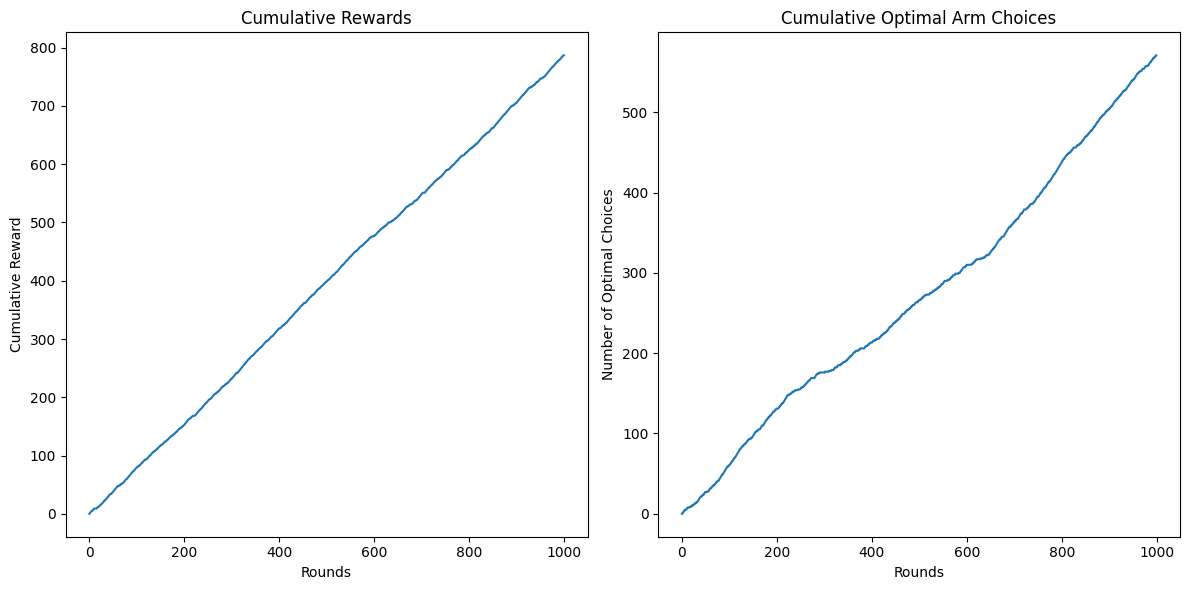

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(cumulative_rewards)
plt.title("Cumulative Rewards")
plt.xlabel("Rounds")
plt.ylabel("Cumulative Reward")
plt.subplot(1, 2, 2)
plt.plot(cumulative_optimal_choices)
plt.title("Cumulative Optimal Arm Choices")
plt.xlabel("Rounds")
plt.ylabel("Number of Optimal Choices")
plt.tight_layout()
plt.show()